### Introduction

In this project, I will be implementing a naive Sentiment Analysis model using Logistic Regression models created from scratch using NumPy as well as Sci-kit APIs. 


## Logistic Regression

#### Dataset

The core IMDB movie reviews dataset contains 50,000 reviews split evenly into 25k train and 25k test sets. The overall distribution of labels is balanced (25k pos and 25k neg).

There are two top-level directories `[train/, test/]` corresponding to the training and test sets. Each contains `[pos/, neg/]` directories for the reviews with binary labels positive and negative. Within these directories, reviews are stored in text files named following the convention `<id>_<rating>.txt` where `id` is a unique id and `rating` is the star rating for that review on a 1-10 scale.

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import os

def load_data(path):
    """
    Loads the data from the given path.
    Returns a list of reviews (as strings) and their corresponding labels (1 for positive, 0 for negative).
    """
    reviews = []
    labels = []
    
    for label_type in ['pos', 'neg']:
        
        dir_name = os.path.join(path, label_type)
        
        for fname in os.listdir(dir_name):
        
            with open(os.path.join(dir_name, fname), 'r', encoding='utf-8') as file:    
                reviews.append(file.read())
            
            if label_type == 'pos':
                labels.append(1)
            else:
                labels.append(0)
    
    return np.array(reviews), np.array(labels)

train_data, train_labels = load_data('Task2/train')
test_data, test_labels = load_data('Task2/train')

print(f"Shape of the training dataset: {train_data.shape}")
print(f"Shape of the test dataset: {test_data.shape}")
print(f"Shape of the training labels: {train_labels.shape}")
print(f"Shape of the test labels: {test_labels.shape}")


Shape of the training dataset: (25000,)
Shape of the test dataset: (25000,)
Shape of the training labels: (25000,)
Shape of the test labels: (25000,)


#### Preprocessing

We will remove the stop words, punctuation marks, special characters and convert the text to lower case and check for any NAN values. 

In [123]:
import string
import re

def getWords(f):

    with open(f, 'r', encoding = 'ISO-8859-1') as file:
        return [word.strip() for word in file.readlines()]

stop_words = getWords('Task2/stop_words.txt')
negative_words = getWords('Task2/negative_words.txt')
positive_words = getWords('Task2/positive_words.txt')

def remove_stop_words(review, stopWordList = stop_words):
    return ' '.join(word for word in review.split() if word not in stopWordList)

def remove_punctuation(text):
    return ''.join(ch for ch in text if ch not in string.punctuation)

train_data = np.array([remove_stop_words(review) for review in train_data])
test_data = np.array([remove_stop_words(review) for review in test_data])

train_data = np.char.lower(train_data)
test_data = np.char.lower(test_data)

train_data = np.array([remove_punctuation(text) for text in train_data])
test_data = np.array([remove_punctuation(text) for text in test_data])

train_nan_indices = np.where(pd.isnull(train_data))[0]
test_nan_indices = np.where(pd.isnull(test_data))[0]

if len(train_nan_indices) > 0:

    print(f"There are {len(train_nan_indices)} NAN values in the training dataset at indices: {train_nan_indices}")

else: 
    
    print("No NAN values in the training set.")
    
if len(test_nan_indices) > 0:

    print(f"There are {len(test_nan_indices)} NAN values in the test dataset at indices: {test_nan_indices}")

else:
    
    print("No NAN values in the test set.")
    
print(train_data[-5:])

No NAN values in the training set.
No NAN values in the test set.
['my comments may bit spoiler worth stop care enoughbr br saving grace titled a paperthin excuse old british women get high onscreen this film dumb the incidental music annoyance obvious hackneyed tunes sporadically pop comment narrative spirit sky example  oh i get it this basically cheech chong movie made credible stodgy english setting brenda blethyns overwhelming power inflict emotion audience using voice alone i could literally hear folks high times magazine receiving jollies enormous buds litter picture worst scene easy brenda attempts peddle illicit wares street london blaring white dresssuit not funny not original not interesting not good movie the 72 rating result zealots overvoting dont waste time'
 'the saucy misadventures four au pairs arrive london day early 1970s theres swedish girl danish german chinese the story contrives get clothes them involve carry ontype humour couple various misfits british film tv 

#### Feature Extraction

In the feature extraction step we need to represent each review by the 2 features $x^{(1)}$: count of positive words, and $x^{(2)}$: count of negative words, and a class label $y$ as shown in the table below:

| Feature | Definition | Comment |
| --- | --- | --- |
| $x^{(1)}$ | count(positive words) ∈ review | Positive lexicon is provided |
| $x^{(2)}$ | count(negative words) ∈ review | Negative lexicon is provided |
| $y$ | 1 if positive, 0 otherwise | Mentioned in directory name |

In [124]:
def extract_features(review):
    
    words = review.split()
    positive_count = sum(word in positive_words for word in words)
    negative_count = sum(word in negative_words for word in words)
    
    return positive_count, negative_count


positive_indices = np.where(train_labels == 1)[0][:5]
negative_indices = np.where(train_labels == 0)[0][:5]

counter = 1

print("POSITIVE REVIEW DATAPOINTS\n\n")

for index in positive_indices:
    
    review = train_data[index]
    pos_count, neg_count = extract_features(review)
    print(f"Review {counter}: {review}\n Positive Count: {pos_count}\n Negative Count: {neg_count}\n Label: 1 (Positive)\n")
    counter += 1
    
print("NEGATIVE REVIEW DATAPOINTS\n\n")
    
for index in negative_indices:
    
    review = train_data[index]
    pos_count, neg_count = extract_features(review)
    print(f"Review {counter}: {review}\n Positive Count: {pos_count}\n Negative Count: {neg_count}\n Label: 0 (negative)\n")
    counter += 1
    
## sahi hai, ab complete data pe apply karna hai extract features 

x1 = []
x2 = []

for review in train_data:
    
    p, n = extract_features(review)
    x1.append(p)
    x2.append(n)
    
x1 = np.array(x1)
x2 = np.array(x2)

t = np.column_stack((train_data, x1, x2, train_labels))

x1 = []
x2 = []

for review in test_data:
    
    p, n = extract_features(review)
    x1.append(p)
    x2.append(n)
    
x1 = np.array(x1)
x2 = np.array(x2)

test_data = np.column_stack((test_data, x1, x2, test_labels))

POSITIVE REVIEW DATAPOINTS


Review 1: for movie gets respect sure lot memorable quotes listed gem imagine movie joe piscopo actually funny maureen stapleton scene stealer the moroni character absolute scream watch alan the skipper hale jr police sgt
 Positive Count: 4
 Negative Count: 2
 Label: 1 (Positive)

Review 2: bizarre horror movie filled famous faces stolen cristina raines later tvs flamingo road pretty somewhat unstable model gummy smile slated pay attempted suicides guarding gateway hell the scenes raines modeling well captured mood music perfect deborah raffin charming cristinas pal raines moves creepy brooklyn heights brownstone inhabited blind priest top floor things really start cooking the neighbors including fantastically wicked burgess meredith kinky couple sylvia miles  beverly dangelo diabolical lot eli wallach great fun wily police detective the movie nearly crosspollination rosemarys baby the exorcistbut combination based bestseller jeffrey konvitz the sentinel en

Now we will split our training dataset into 9:1 for training and evaluation. The evaluation dataset will help us finetune the hyperparameters. 

In [125]:
combined_data = t
np.random.shuffle(combined_data)
split_idx = int(0.9 * combined_data.shape[0])

training_data = combined_data[:split_idx]
eval_data = combined_data[split_idx:]

training_reviews = training_data[:, 1:3]  
training_labels = training_data[:, -1]

eval_reviews = eval_data[:, 1:3] 
eval_labels = eval_data[:, -1]

print(training_reviews.shape)
print(training_labels.shape)
print(eval_reviews.shape)
print(eval_labels.shape)

(22500, 2)
(22500,)
(2500, 2)
(2500,)


### Implementation from Scratch

Now we will reate a class to implement the following methods  to create a fully fledged Logistic Regression model:

* `sigmoid(x)`: This is the non-linear "activation" function that differentiates Logistic from plain-old Linear Regression.

* `cross_entropy_loss(y_true, y_pred)`: This is the loss function that will help us calculate the gradients for updating our model. Since this is a Binary Classification task so we can use the Binary Cross Entropy function.

* `fit(x_train, y_train)`:  Gradient Descent algorithm 

* `predict(x_test)`: predict whether the label is 0 or 1 for test reviews using learned logistic regression (using the decision threshold of 0.5) 

* `evaluate(y_true, y_pred)` function that calculates classification accuracy, F1 Score and confusion matrix. 

In [179]:
class LogisticRegression:
    
    def __init__(self, learning_rate = 0.01, iterations = 1000):
        
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
        
    def sigmoid(self, x):

        sig = 1 / (1 + np.exp(-x))
        return sig
    
    def cross_entropy_loss(self, y_true, y_pred):
        
        m = len(y_true)
        epsilon = 1e-15
        y_pred = np.maximum(epsilon, y_pred)
        y_pred = np.minimum(1 - epsilon, y_pred)
        loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)).mean()

        return loss

    def fit(self, x_train, y_train):
        
        n_samples, n_features = x_train.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for i in range(self.iterations):
            
            y_pred = self.sigmoid(np.dot(x_train, self.weights) + self.bias)
            dw = (1 / n_samples) * np.dot(x_train.T, (y_pred - y_train))
            db = (1 / n_samples) * np.sum(y_pred - y_train)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, x_test):
        
        y_pred = self.sigmoid(np.dot(x_test, self.weights) + self.bias)
        pred = [1 if i > 0.5 else 0 for i in y_pred]
        
        return np.array(pred)
    
    def evaluate(self, y_true, y_pred):

        accuracy = np.mean(y_true == y_pred)
        
        tp = np.sum((y_true == 1) & (y_pred == 1))
        tn = np.sum((y_true == 0) & (y_pred == 0))
        fp = np.sum((y_true == 0) & (y_pred == 1))
        fn = np.sum((y_true == 1) & (y_pred == 0))

        precision = tp / (tp + fp) 
        recall = tp / (tp + fn) 
        
        f1 = 2 * (precision * recall) / (precision + recall)
        
        confusion_matrix = np.array([
            [tp, fp],
            [fn, tn]
        ])
        
        return accuracy, f1, confusion_matrix

Tuning the hyperparameter .i.e, learning rate and number of epochs to minimize the validation loss.

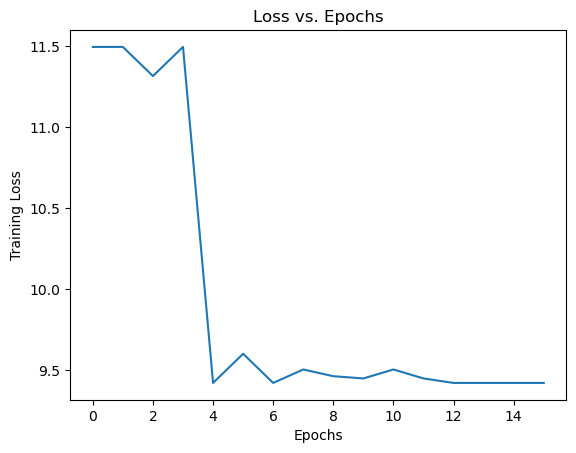

In [190]:
lrList = [0.1,0.01,0.05,0.001]
iterList = [1000,5000,500,3000]
res = []

for i in lrList:
    for j in iterList:
        LR = LogisticRegression(learning_rate=i, iterations=j)
        LR.fit(training_reviews.astype(int), training_labels.astype(int))
        y_pred = LR.predict(eval_reviews.astype(int))
        loss = LR.cross_entropy_loss(eval_labels.astype(int), y_pred.astype(int))
        res.append(loss)

plt.plot(res)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Loss vs. Epochs')
plt.show()

Running the model we have created on the test set.

Accuracy =  0.72956
F1 =  0.733472621910356


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression Model From Scratch')

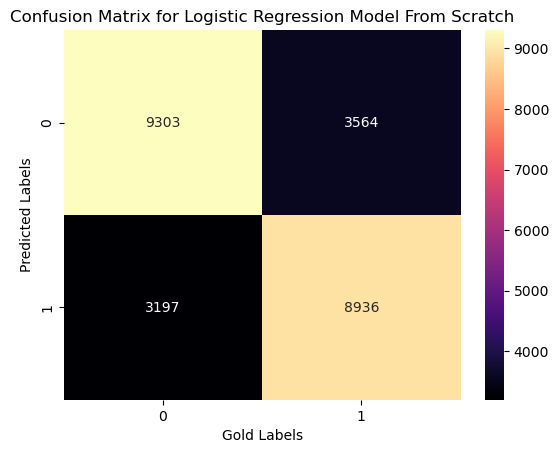

In [189]:
bestLR = LogisticRegression(0.001, 5000)
x_test = test_data[:, 1:3].astype(int)  
y_test = test_data[:, -1].astype(int)
bestLR.fit(combined_data[:, 1:3].astype(int), combined_data[:, -1].astype(int))
pred = bestLR.predict(x_test)
accuracy, f1, confusion = bestLR.evaluate(y_test, pred)

print("Accuracy = ", accuracy)
print("F1 = ", f1)
sns.heatmap(confusion, annot=True, fmt="g", cmap="magma", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Gold Labels')
plt.ylabel('Predicted Labels')
plt.title('Confusion Matrix for Logistic Regression Model From Scratch')

### Using Scikit-learn

In this part, I will use scikit-learn’s [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) implementation to train and test the logistic regression on the provided dataset.

Accuracy: 0.72568
F1 Score: 0.7257896841263495
Confusion Matrix:
[[9066 3434]
 [3424 9076]]


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression Model Using Scikit Learn')

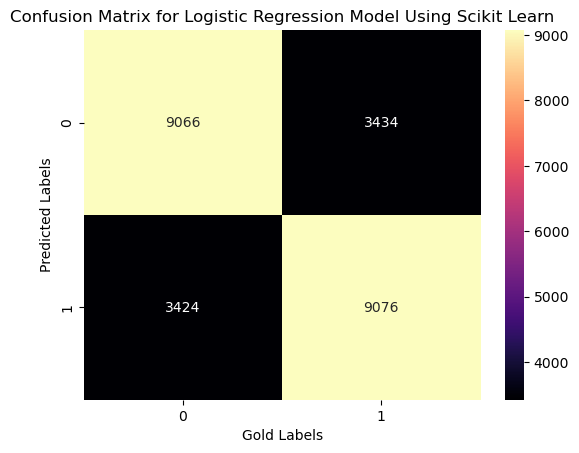

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

X_train = combined_data[:, 1:3].astype(float)
y_train = combined_data[:, 3].astype(float) 

X_test = test_data[:, 1:3].astype(float)
y_test = test_data[:, 3].astype(float)

ScikitLR = LogisticRegression()
ScikitLR.fit(X_train, y_train)

y_pred = ScikitLR.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{confusion_matrix}")

sns.heatmap(confusion_matrix, annot=True, fmt="g", cmap="magma", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Gold Labels')
plt.ylabel('Predicted Labels')
plt.title('Confusion Matrix for Logistic Regression Model Using Scikit Learn')
